In [5]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
#print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

#One-Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
k_1=200
std=1e-5
w1 = std*np.random.randn(Din, k_1)
b1 = np.zeros(k_1)
k_2=10
w2 = std*np.random.randn(200, k_2)
b2 = np.zeros(k_2)

print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
print("w1:", w1.shape)
print("b1:", b1.shape)
def accuracy(predict,labels):
    predict_class = np.argmax(predict, axis=1)
    g_truth = np.argmax(labels, axis=1)
    accu_predict = [predict_class == g_truth]
    return 100*np.sum(accu_predict)/len(g_truth)

epochs = 300
lr = 1.4e-2
lr_decay=0.999
reg = 5e-5
batch_size = 500
val_batch_size = Nte
loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

def batching (list,m):
  batch=[]
  for i in range (round(len(list)/m)):
    batch.append(list[i*m:m*(i+1)])
  return batch
for t in range(1,epochs+1):
  indices = np.arange(Ntr)
  rng.shuffle(indices)
  batches = batching(indices, batch_size)

  loss_h = []
  train_acc_h = []
  

  for batch_indices in batches:
    x = x_train[batch_indices]
    y = y_train[batch_indices]

    h = 1./(1.+np.exp(-(x.dot(w1)+b1)))
    y_pred = h.dot(w2)+b2
    train_acc = find_accuracy(y_pred, y)
    train_acc_h.append(train_acc)
    loss = 1./(batch_size*2)*np.square(y_pred-y).sum() + reg/(batch_size*2)*(np.sum(w1*w1)+np.sum(w2*w2))
    loss_h.append(loss)

    dy = 1.0/batch_size*(y_pred-y)
    dw2 = h.T.dot(dy) + 1./batch_size*reg*w2
    w2 -= lr*dw2
    db2 = dy.sum(axis = 0)
    b2 -= lr*db2
    dh = dy.dot(w2.T)
    dw1 = x.T.dot(dh*h*(1-h)) + 1./batch_size*reg*w1
    w1 -= lr*dw1
    db1 = (dh*h*(1-h)).sum(axis =0)
    b1 -= lr*db1

  h_val = 1./(1.+np.exp(-(x_test.dot(w1)+b1)))
  y_pred_val = h_val.dot(w2)+b2
  val_loss = 1./(val_batch_size*2)*np.square(y_pred_val-y_test).sum()
  val_loss_history.append(val_loss)
  val_accuracy = accuracy(y_pred_val, y_test)
  val_acc_history.append(val_accuracy)
  avg_loss = sum(loss_h)/len(loss_h)
  loss_history.append(avg_loss)
  avg_accuracy = sum(train_acc_h)/len(train_acc_h)
  train_acc_history.append(avg_accuracy)

  lr *= lr_decay
  if t%5==0 or t == epochs:
    print('Epochs %d/%d: Training Loss: %f, Validation Loss:%f,  Training Accuracy: %f, Validation Accuracy: %f'%(t, epochs,avg_loss,val_loss, avg_accuracy, val_accuracy))

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
w1: (3072, 200)
b1: (200,)
Epochs 5/300: Training Loss: 0.374607, Validation Loss:0.377607,  Training Accuracy: 44.518000, Validation Accuracy: 43.630000
Epochs 10/300: Training Loss: 0.356314, Validation Loss:0.370907,  Training Accuracy: 49.292000, Validation Accuracy: 45.320000
Epochs 15/300: Training Loss: 0.343335, Validation Loss:0.370821,  Training Accuracy: 52.552000, Validation Accuracy: 45.440000
Epochs 20/300: Training Loss: 0.332248, Validation Loss:0.370712,  Training Accuracy: 55.844000, Validation Accuracy: 46.170000
Epochs 25/300: Training Loss: 0.323019, Validation Loss:0.374148,  Training Accuracy: 58.708000, Validation Accuracy: 45.580000
Epochs 30/300: Training Loss: 0.314670, Validation Loss:0.377165,  Training Accuracy: 60.890000, Validation Accuracy: 45.730000
Epochs 35/300: Training Loss: 0.307227, Validation Loss:0.379770,  Training Accuracy: 63.130000, Validation Accuracy: 44.800000
Epochs 40/300: Training Los

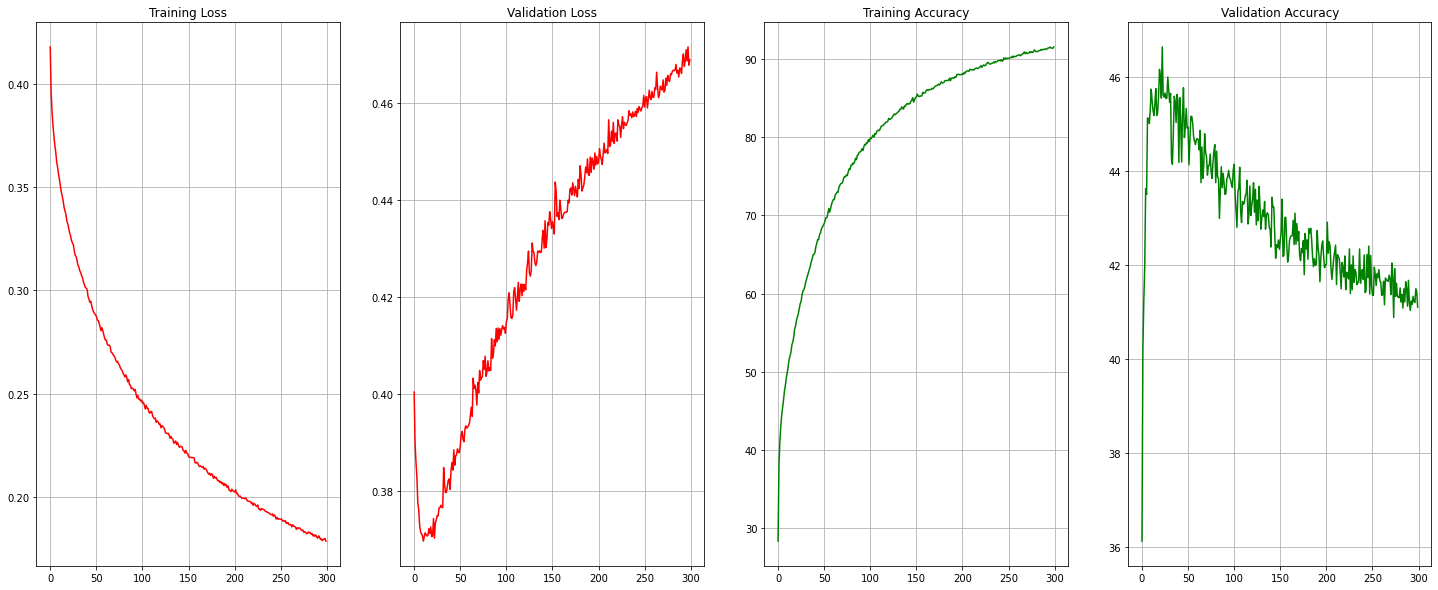

In [10]:
fig, axes  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(25,10))
item1 = {"Training Loss":loss_history, "Validation Loss":val_loss_history}
i = 1
for key in item1.keys():
    plt.subplot(1,4,i);plt.plot(item1[key],'r')
    plt.title(key)
    plt.grid()
    i+=1
item2={"Training Accuracy":train_acc_history, "Validation Accuracy": val_acc_history}
j= 3
for key in item2.keys():
    plt.subplot(1,4,j);plt.plot(item2[key], 'g')
    plt.title(key)
    plt.grid(True)
    j+=1